In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Big Mart Sales Prediction\Train.csv")
test = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Big Mart Sales Prediction\Test.csv")

In [3]:
print(train.shape)
train.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
print(test.shape)
test.head()

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
df = pd.concat([train, test], ignore_index = True, axis = 0).reset_index(drop = True)
print(train.shape, test.shape, df.shape)

(8523, 12) (5681, 11) (14204, 12)


In [8]:
print(df.shape)
df.head()

(14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
df.dropna(how = 'any').shape

(4650, 12)

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(keep = 'first').shape

(14204, 12)

In [13]:
df.drop_duplicates(keep = False).shape

(14204, 12)

In [14]:
df.dropna(subset = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
                    'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 
                    'Item_Outlet_Sales'], how = 'any').shape

(4650, 12)

In [15]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,False,False,False,False,False,False,False,False,False,False,False,True
14200,False,False,False,False,False,False,False,False,False,False,False,True
14201,False,False,False,False,False,False,False,False,True,False,False,True
14202,False,False,False,False,False,False,False,False,True,False,False,True


In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [17]:
# drop the Date column
df.drop(columns=['Item_Identifier'],inplace=True)

In [18]:
df["Item_Weight"].fillna(method = 'ffill', inplace = True)
df["Outlet_Size"].fillna(method = 'ffill', inplace = True)
df["Item_Outlet_Sales"].fillna(method = 'ffill', inplace = True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,765.67
14200,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,765.67
14201,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,765.67
14202,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,765.67
14203,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1,765.67


In [20]:
df.apply(lambda x: x.dtype)

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [22]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [23]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0


In [24]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

Item_Weight : 415
Item_Fat_Content : 5
Item_Visibility : 13006
Item_Type : 16
Item_MRP : 8052
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


In [25]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [26]:
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052  


In [27]:
categorical_data = df.select_dtypes(exclude=np.number) 
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  Item_Fat_Content              Item_Type Outlet_Identifier Outlet_Size  \
0          Low Fat                  Dairy            OUT049      Medium   
1          Regular            Soft Drinks            OUT018      Medium   
2          Low Fat                   Meat            OUT049      Medium   
3          Regular  Fruits and Vegetables            OUT010      Medium   
4          Low Fat              Household            OUT013        High   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 3  Supermarket Type2  
2               Tier 1  Supermarket Type1  
3               Tier 3      Grocery Store  
4               Tier 3  Supermarket Type1  


In [28]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [29]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


In [30]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [31]:
#Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 4


In [32]:
df.describe(include = object)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,14204,14204
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,8485,2013,1559,6537,5583,9294


In [33]:
item_fat_content_Series = df['Item_Fat_Content']
item_fat_content_levels = item_fat_content_Series.unique()
item_fat_content_levels

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [34]:
item_fat_content_freq_table = pd.crosstab(index = df['Item_Fat_Content'], columns = 'freq')
item_fat_content_freq_table

col_0,freq
Item_Fat_Content,
LF,522
Low Fat,8485
Regular,4824
low fat,178
reg,195


In [35]:
item_type_Series = df['Item_Type']
item_type_levels = item_type_Series.unique()
item_type_levels

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [36]:
item_type_freq_table = pd.crosstab(index = df['Item_Type'], columns = 'freq')
item_type_freq_table

col_0,freq
Item_Type,
Baking Goods,1086
Breads,416
Breakfast,186
Canned,1084
Dairy,1136
Frozen Foods,1426
Fruits and Vegetables,2013
Hard Drinks,362
Health and Hygiene,858


In [37]:
outlet_identifier_Series = df['Outlet_Identifier']
outlet_identifier_levels = outlet_identifier_Series.unique()
outlet_identifier_levels

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [38]:
outlet_identifier_freq_table = pd.crosstab(index = df['Outlet_Identifier'], columns = 'freq')
outlet_identifier_freq_table

col_0,freq
Outlet_Identifier,
OUT010,925
OUT013,1553
OUT017,1543
OUT018,1546
OUT019,880
OUT027,1559
OUT035,1550
OUT045,1548
OUT046,1550


In [39]:
outlet_size_Series = df['Outlet_Size']
outlet_size_levels = outlet_size_Series.unique()
outlet_size_levels

array(['Medium', 'High', 'Small'], dtype=object)

In [40]:
outlet_size_freq_table = pd.crosstab(index = df['Outlet_Size'], columns = 'freq')
outlet_size_freq_table

col_0,freq
Outlet_Size,
High,2167
Medium,6537
Small,5500


In [41]:
outlet_location_type_Series = df['Outlet_Location_Type']
outlet_location_type_levels = outlet_location_type_Series.unique()
outlet_location_type_levels

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [42]:
outlet_location_type_freq_table = pd.crosstab(index = df['Outlet_Location_Type'], columns = 'freq')
outlet_location_type_freq_table

col_0,freq
Outlet_Location_Type,
Tier 1,3980
Tier 2,4641
Tier 3,5583


In [43]:
outlet_type_Series = df['Outlet_Type']
outlet_type_levels = outlet_type_Series.unique()
outlet_type_levels

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [44]:
outlet_type_freq_table = pd.crosstab(index = df['Outlet_Type'], columns = 'freq')
outlet_type_freq_table

col_0,freq
Outlet_Type,
Grocery Store,1805
Supermarket Type1,9294
Supermarket Type2,1546
Supermarket Type3,1559


In [45]:
df.describe(include = 'all')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,14204,14204,14204,14204.000000
unique,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,8485,NaN,2013,NaN,1559,NaN,6537,5583,9294,NaN
mean,12.775474,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,1615.101146
std,4.645307,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1492.748122
min,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,765.670000
50%,12.500000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,765.670000
75%,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,2163.184200


In [46]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.775474,0.065953,141.004977,1997.830681,1615.101146
std,4.645307,0.051459,62.086938,8.371664,1492.748122
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,765.670000
50%,12.500000,0.054021,142.247000,1999.000000,765.670000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


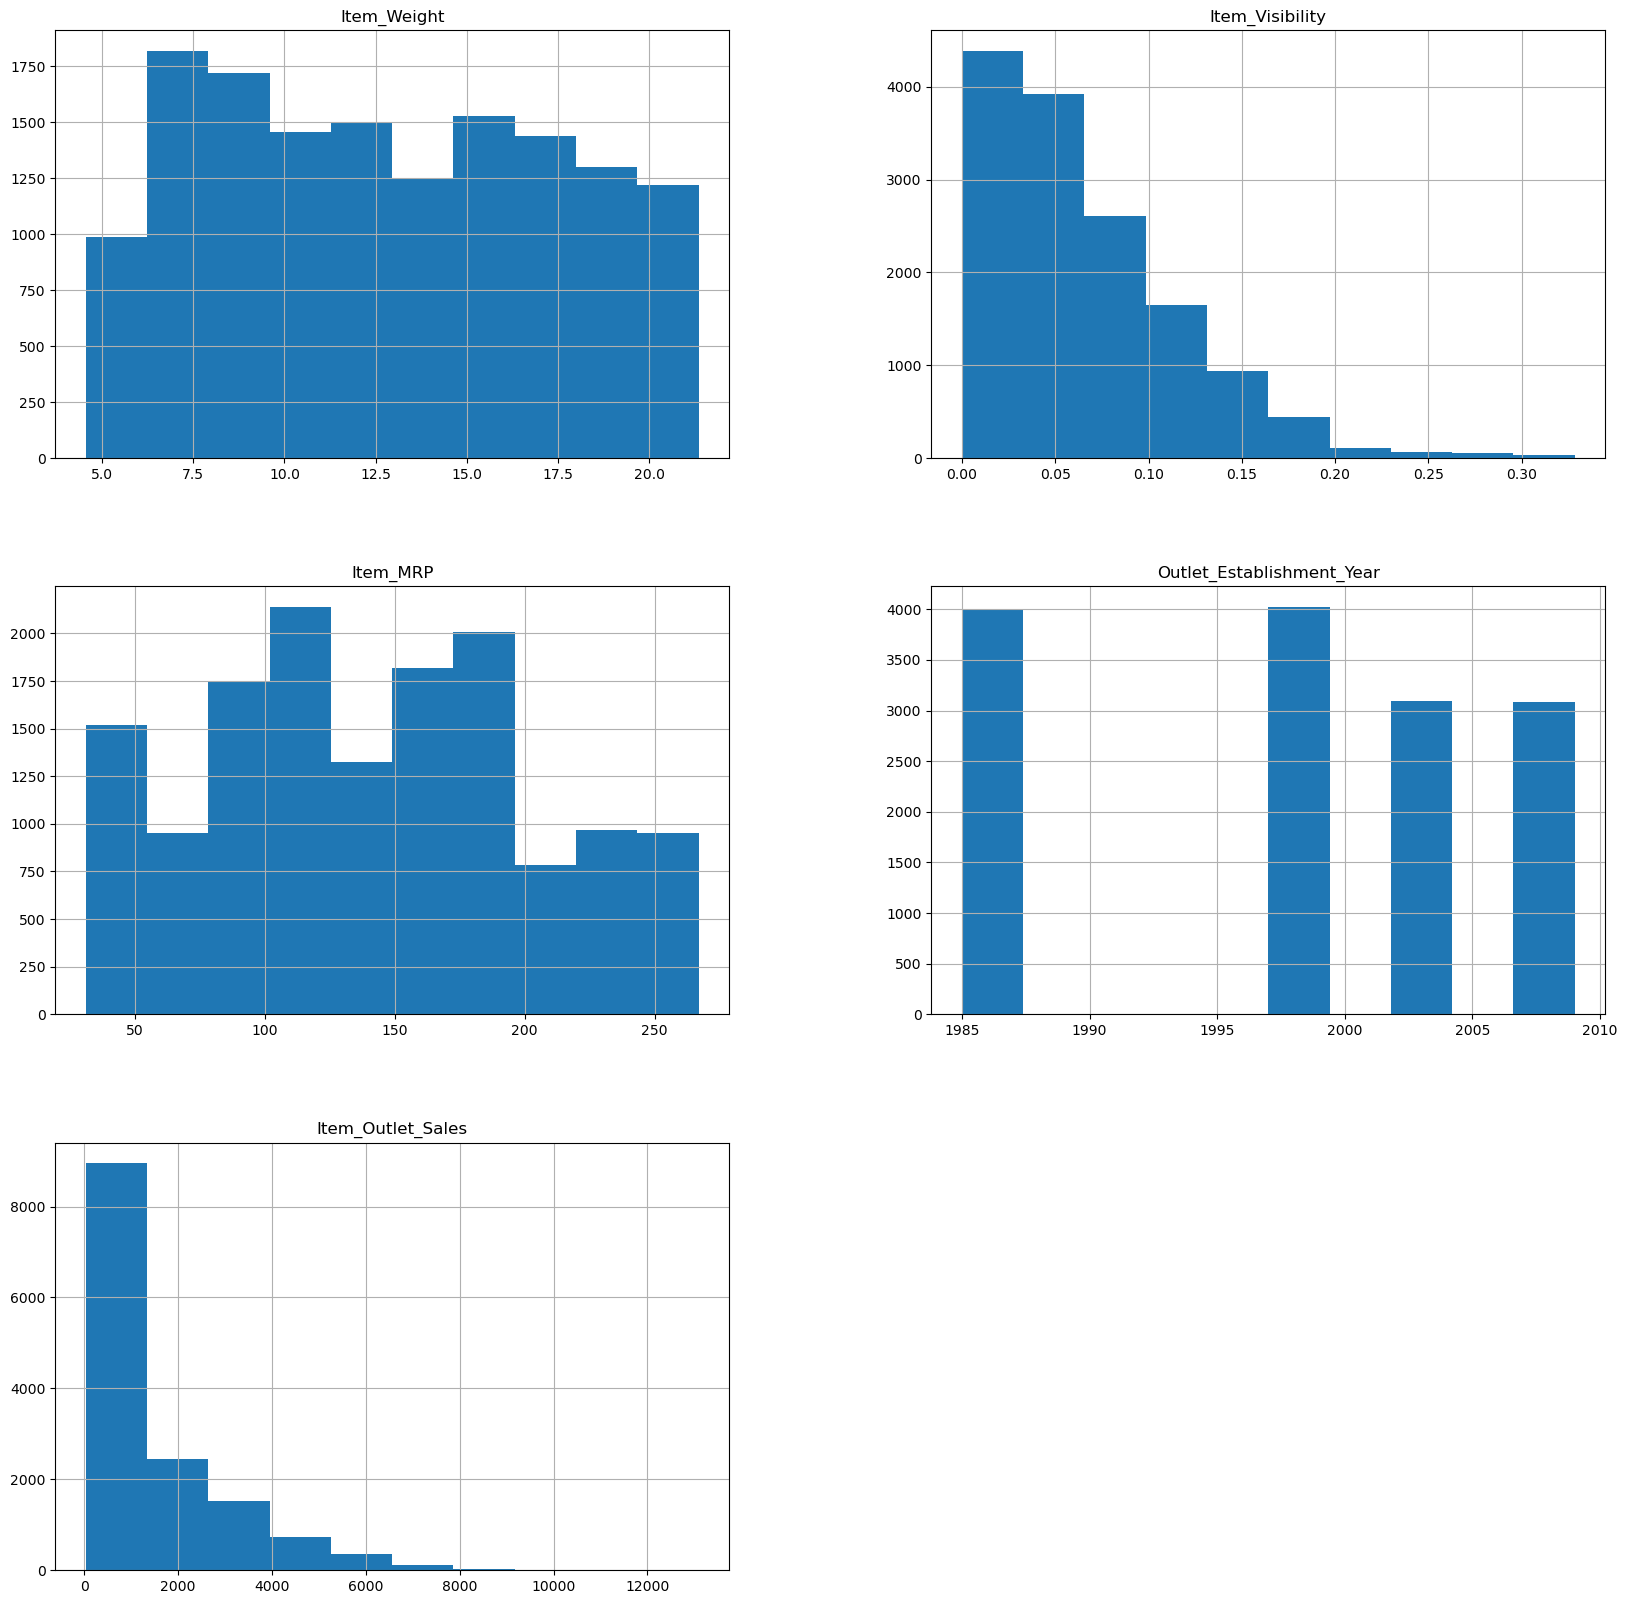

In [47]:
df.hist(figsize=(20,20))
plt.show()

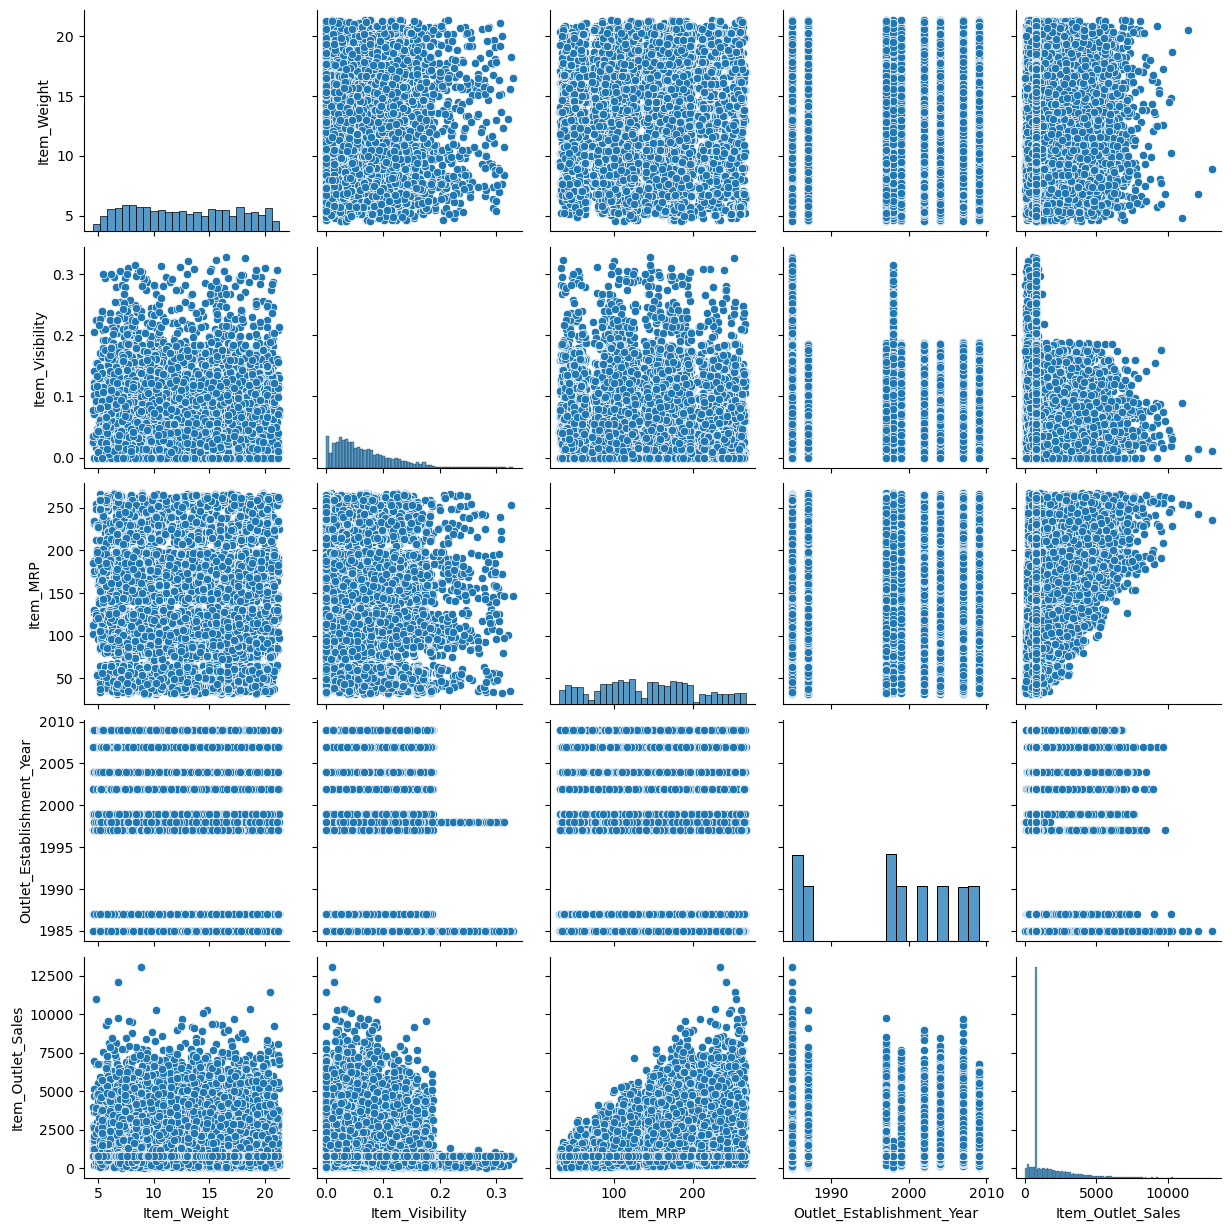

In [48]:
sns.pairplot(df)

In [49]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,
            color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

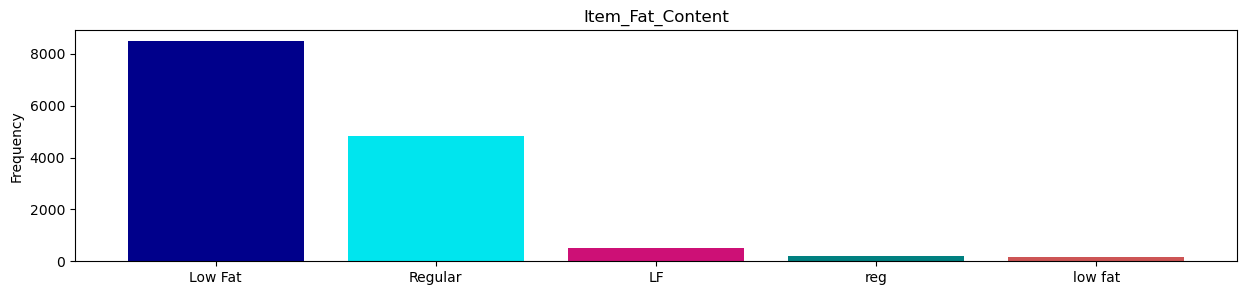

Item_Fat_Content: 
 Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64


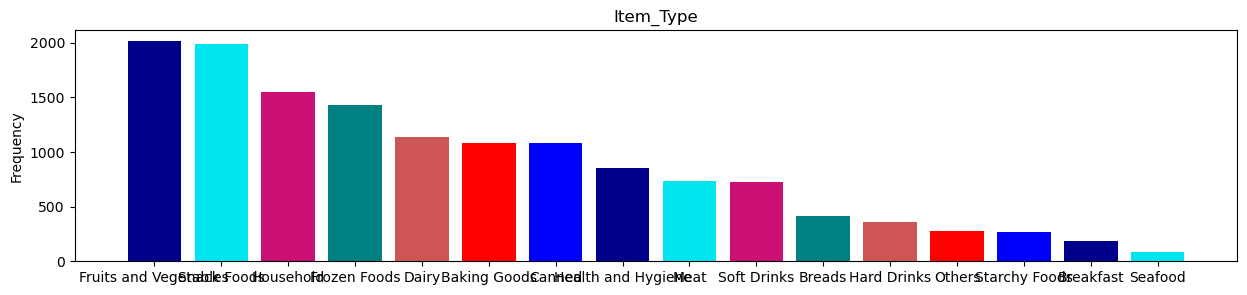

Item_Type: 
 Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64


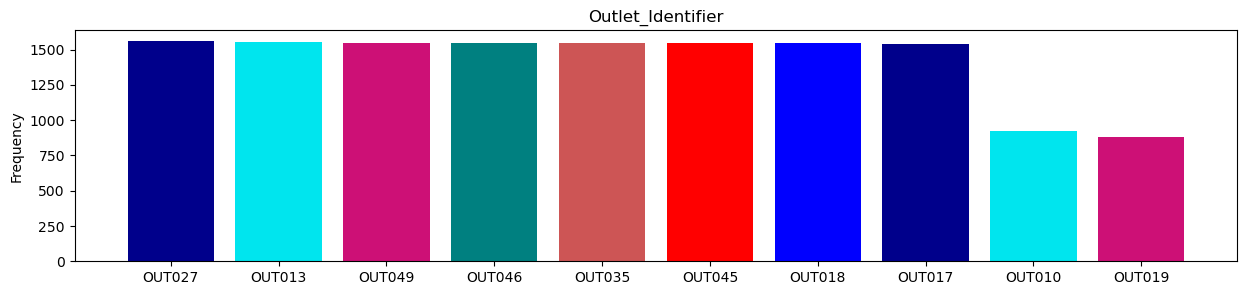

Outlet_Identifier: 
 Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64


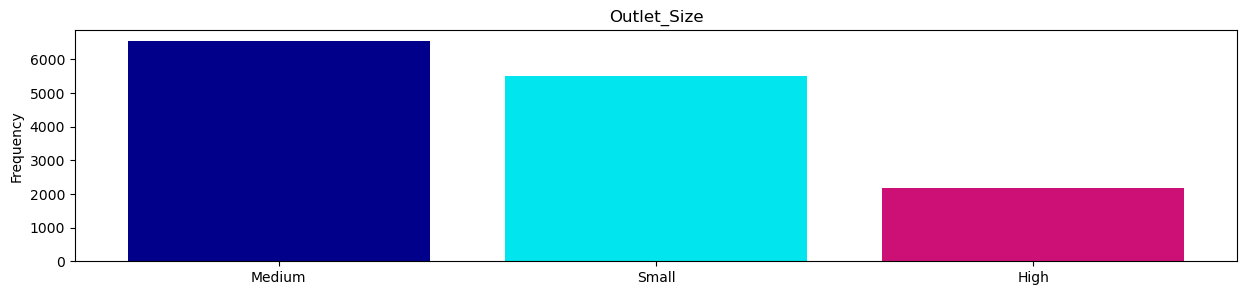

Outlet_Size: 
 Outlet_Size
Medium    6537
Small     5500
High      2167
Name: count, dtype: int64


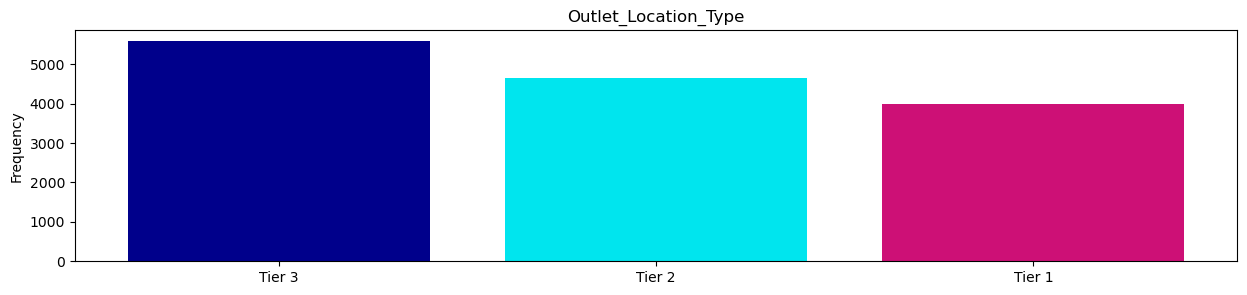

Outlet_Location_Type: 
 Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64


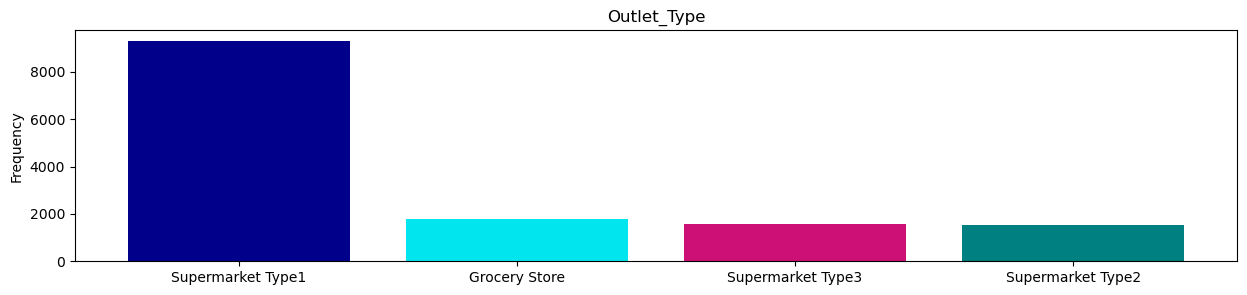

Outlet_Type: 
 Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64


In [50]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for c in categorical_cols:
    bar_plot(c)

In [51]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num_col = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

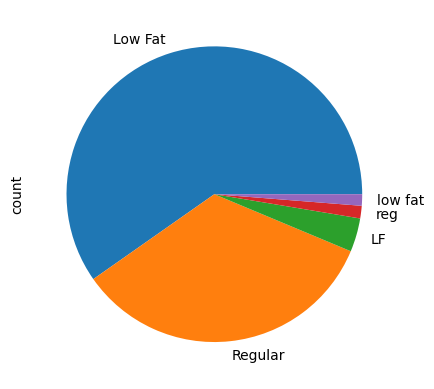

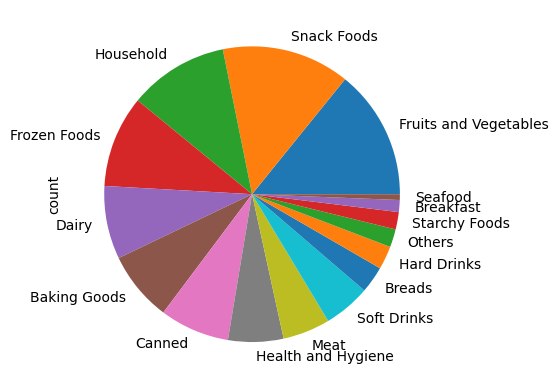

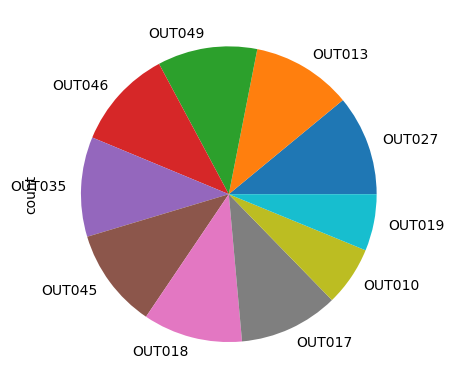

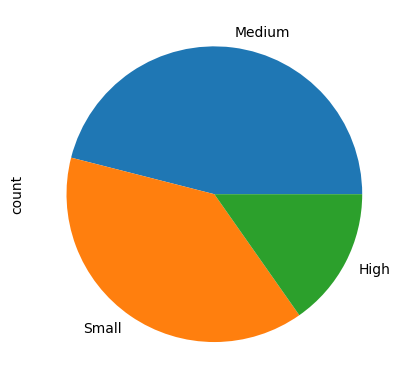

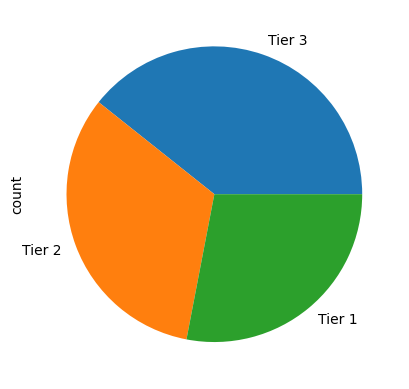

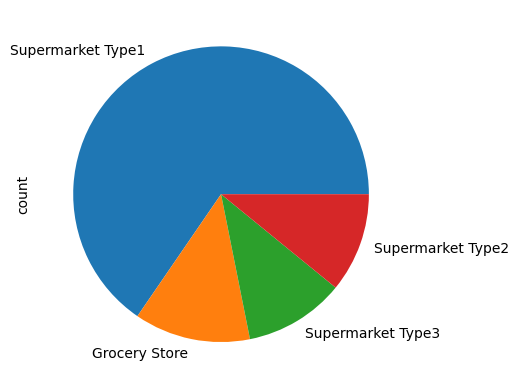

In [52]:
for col in cat_col : 
    plt.figure()
    df[col].value_counts().plot.pie()

In [53]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ Item_Fat_Content  value counts---------------------
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
------------ Item_Type  value counts---------------------
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
------------ Outlet_Identifier  value counts---------------------
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name

In [54]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

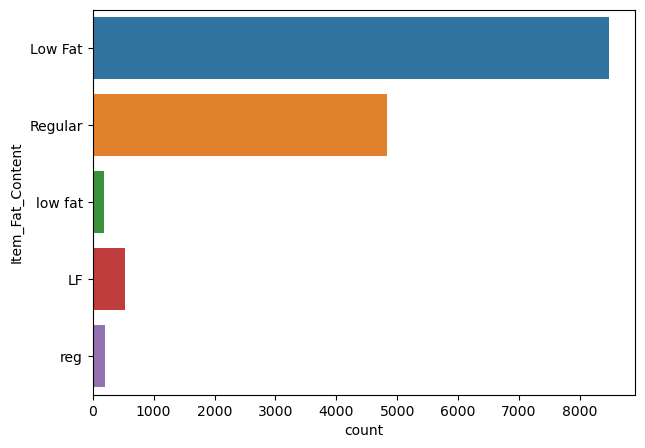

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Item_Fat_Content'])

<Axes: ylabel='count'>

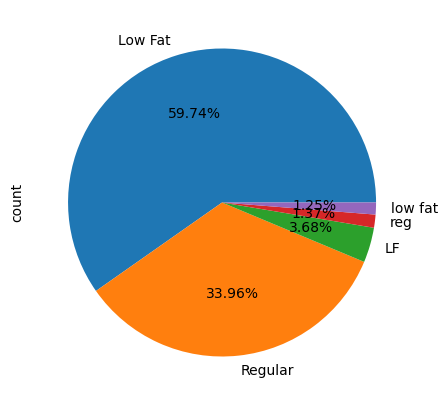

In [56]:
plt.figure(figsize=(7,5))
df['Item_Fat_Content'].value_counts().plot.pie(autopct="%0.2f%%")

In [57]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Type'>

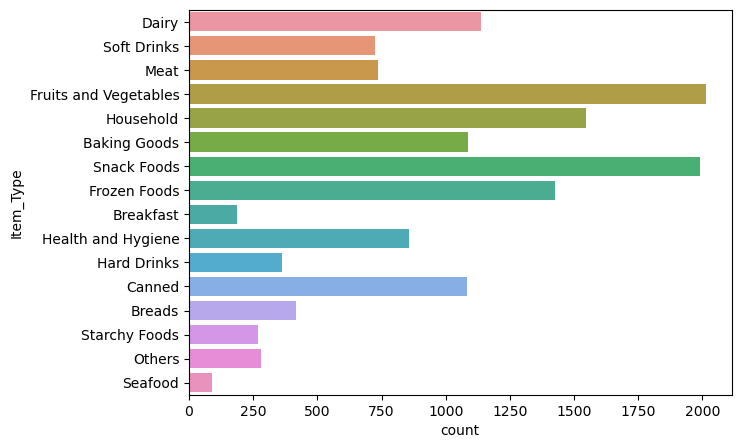

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Item_Type'])

<Axes: ylabel='count'>

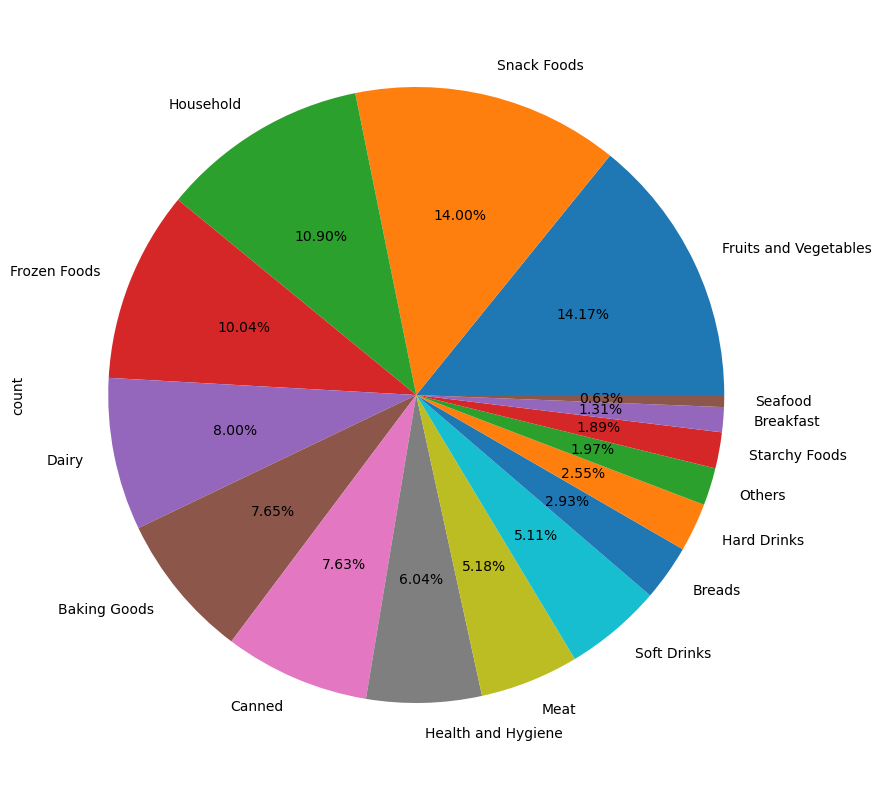

In [59]:
plt.figure(figsize=(10,10))
df['Item_Type'].value_counts().plot.pie(autopct="%0.2f%%")

In [60]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

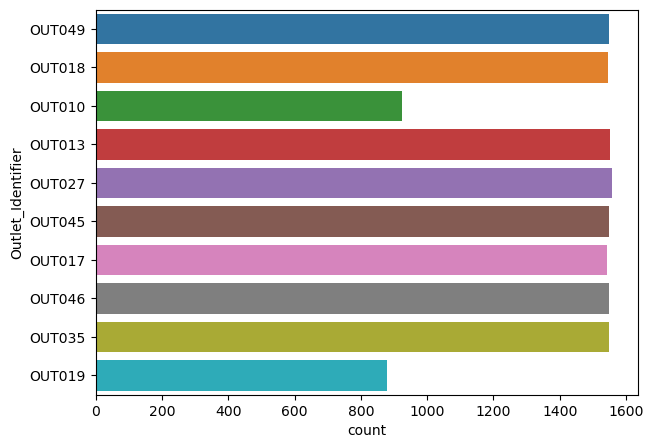

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Outlet_Identifier'])

<Axes: ylabel='count'>

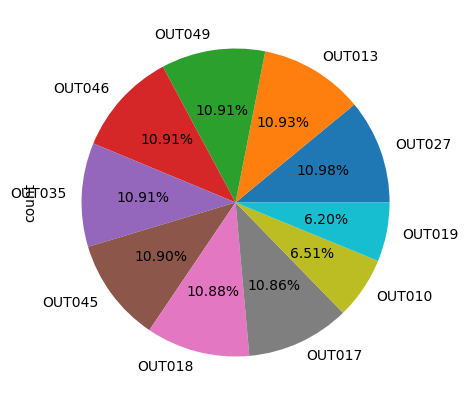

In [62]:
plt.figure(figsize=(7,5))
df['Outlet_Identifier'].value_counts().plot.pie(autopct="%0.2f%%")

In [63]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    6537
Small     5500
High      2167
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Size'>

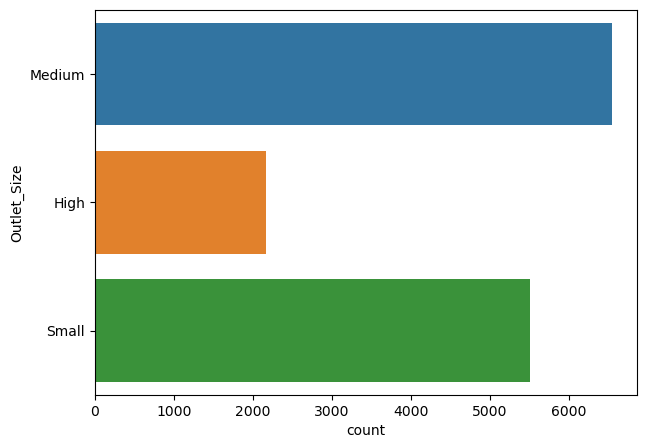

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Outlet_Size'])

<Axes: ylabel='count'>

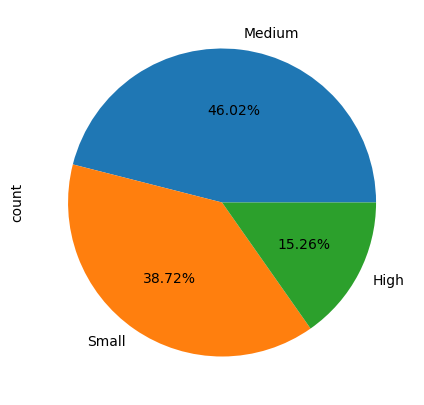

In [65]:
plt.figure(figsize=(7,5))
df['Outlet_Size'].value_counts().plot.pie(autopct="%0.2f%%")

In [66]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

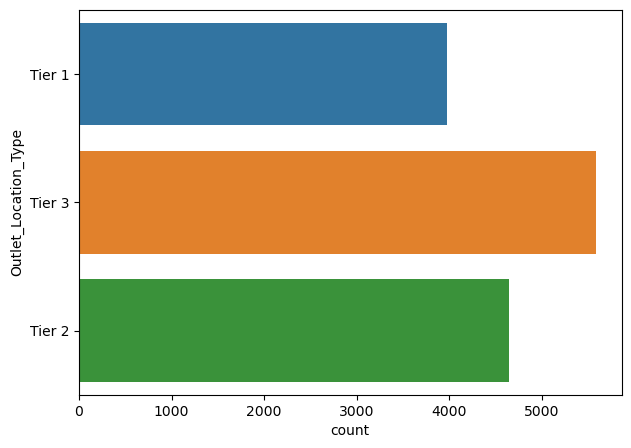

In [67]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Outlet_Location_Type'])

<Axes: ylabel='count'>

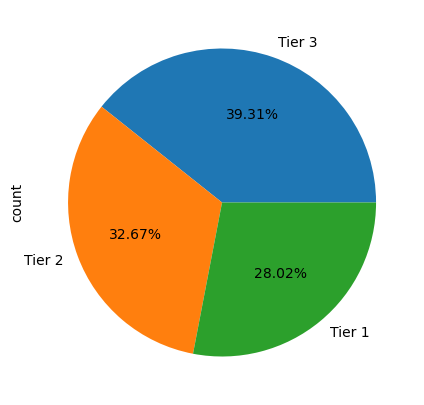

In [68]:
plt.figure(figsize=(7,5))
df['Outlet_Location_Type'].value_counts().plot.pie(autopct="%0.2f%%")

In [69]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Type'>

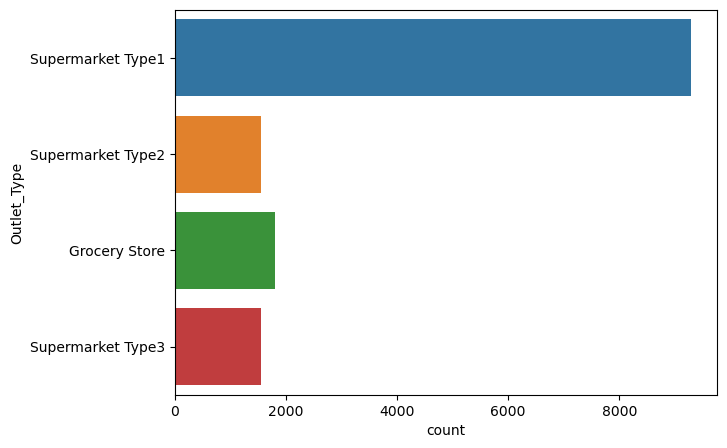

In [70]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Outlet_Type'])

<Axes: ylabel='count'>

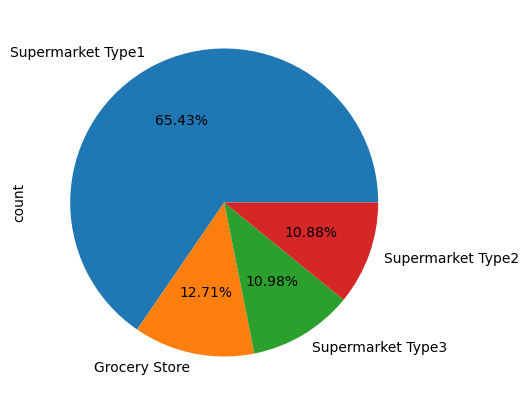

In [71]:
plt.figure(figsize=(7,5))
df['Outlet_Type'].value_counts().plot.pie(autopct="%0.2f%%")

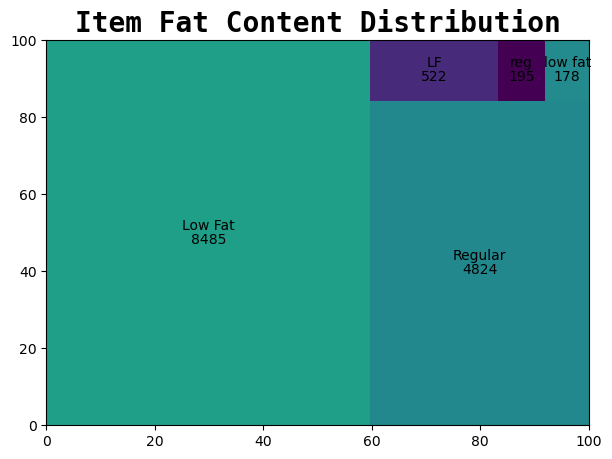

In [72]:
item_fat_content = df['Item_Fat_Content'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = item_fat_content.values, label = item_fat_content.index, value = item_fat_content.values)
plt.title('Item Fat Content Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

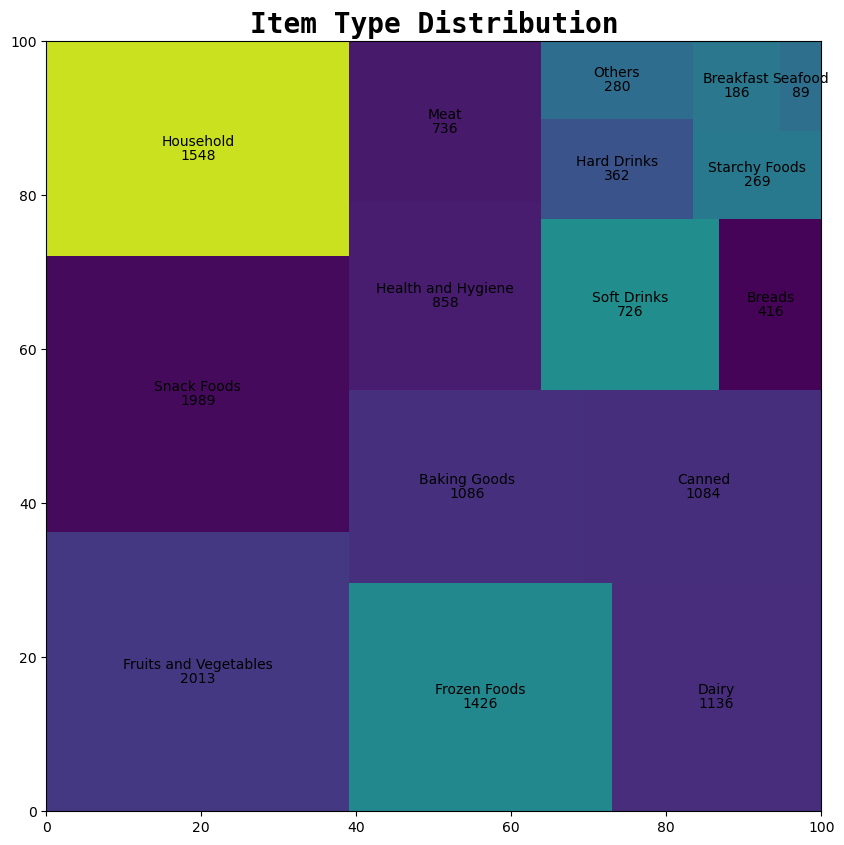

In [73]:
item_type = df['Item_Type'].value_counts()

plt.style.use('default')
plt.figure(figsize = (10, 10))
squarify.plot(sizes = item_type.values, label = item_type.index, value = item_type.values)
plt.title('Item Type Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

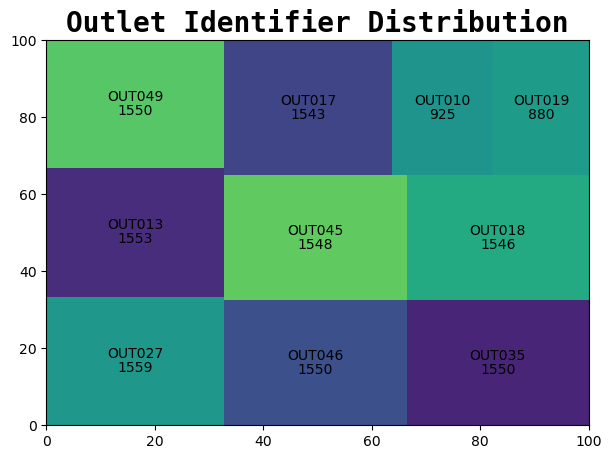

In [74]:
outlet_identifier = df['Outlet_Identifier'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = outlet_identifier.values, label = outlet_identifier.index, value = outlet_identifier.values)
plt.title('Outlet Identifier Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

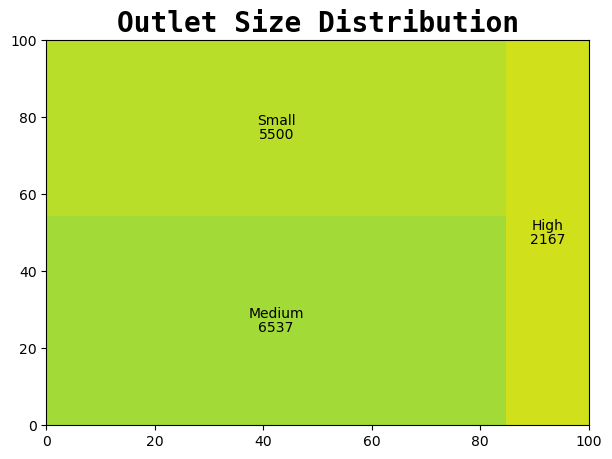

In [75]:
outlet_size = df['Outlet_Size'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = outlet_size.values, label = outlet_size.index, value = outlet_size.values)
plt.title('Outlet Size Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

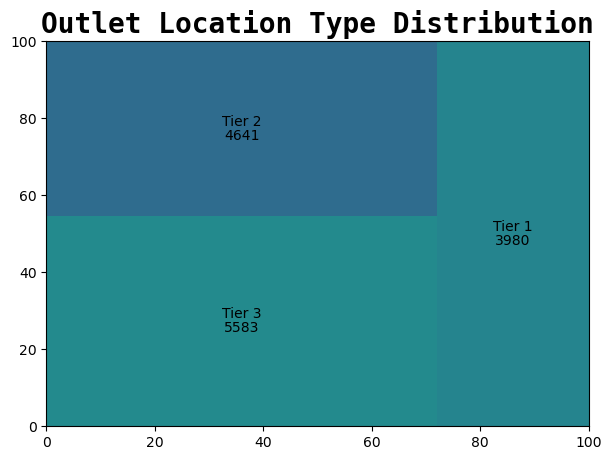

In [76]:
outlet_location_type = df['Outlet_Location_Type'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = outlet_location_type.values, label = outlet_location_type.index, value = outlet_location_type.values)
plt.title('Outlet Location Type Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

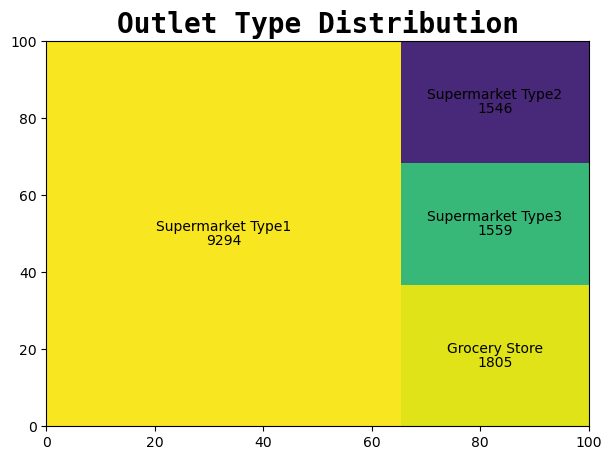

In [77]:
outlet_type = df['Outlet_Type'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = outlet_type.values, label = outlet_type.index, value = outlet_type.values)
plt.title('Outlet Type Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

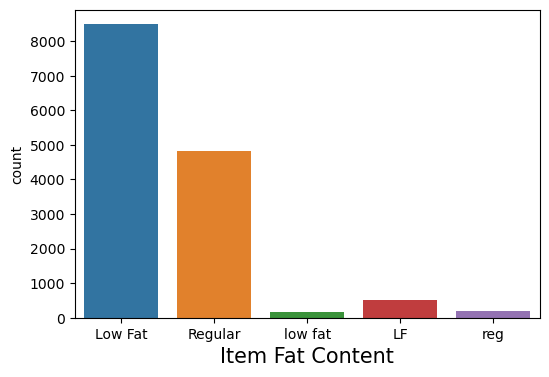

In [78]:
# CountPlot for Item_Fat_Content
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize = 15)
plt.show()

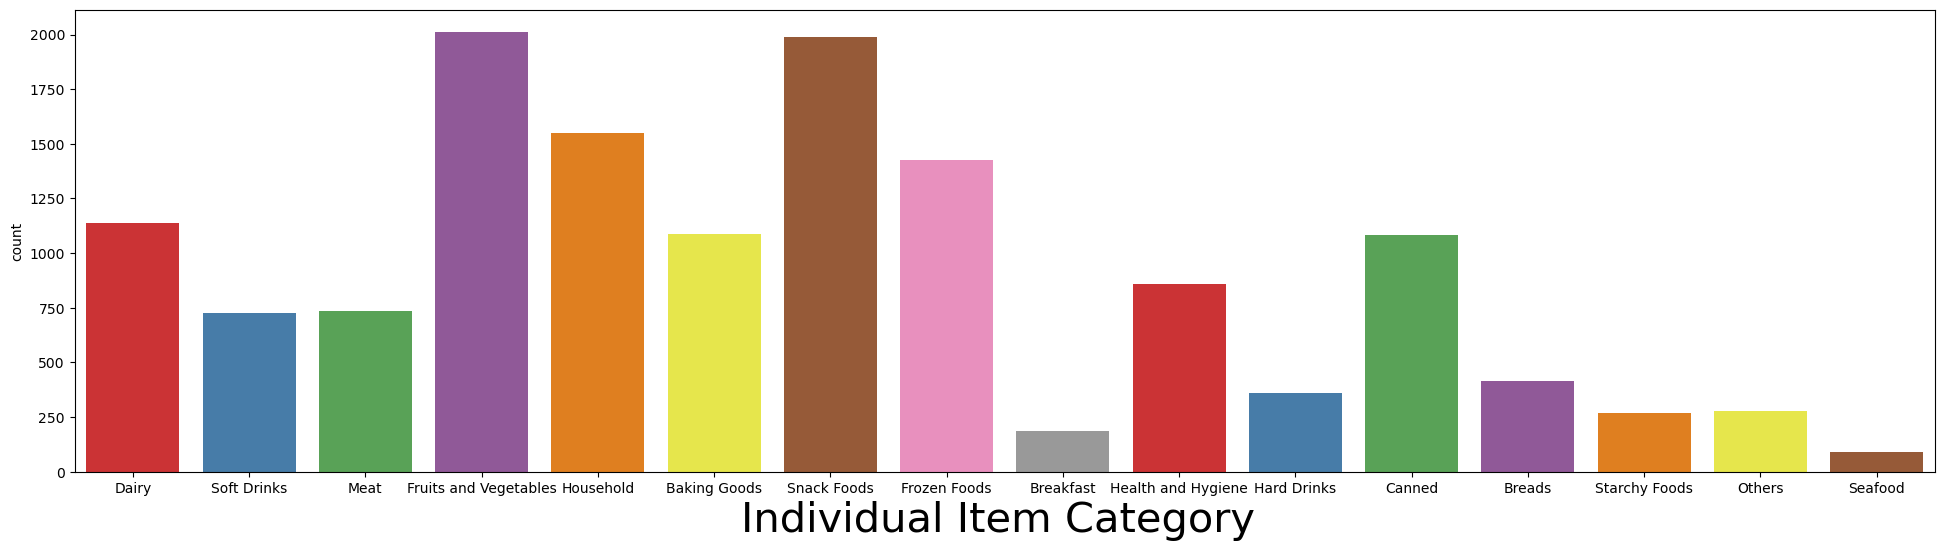

In [79]:
# CountPlot for Individual Item Category
plt.figure(figsize = (24,6))
sns.countplot(data = df, x = 'Item_Type',  palette = 'Set1')
plt.xlabel('Individual Item Category ', fontsize = 30)
plt.show()

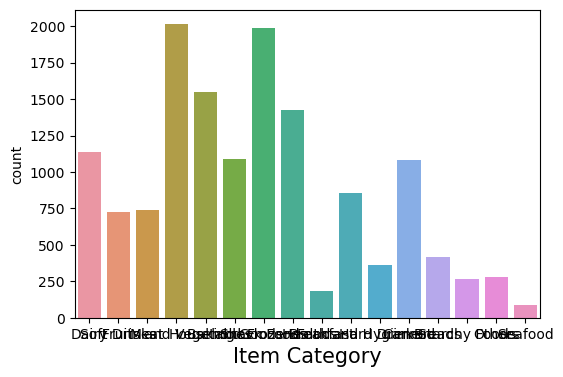

In [80]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Item_Type')
plt.xlabel('Item Category', fontsize = 15)
plt.show()

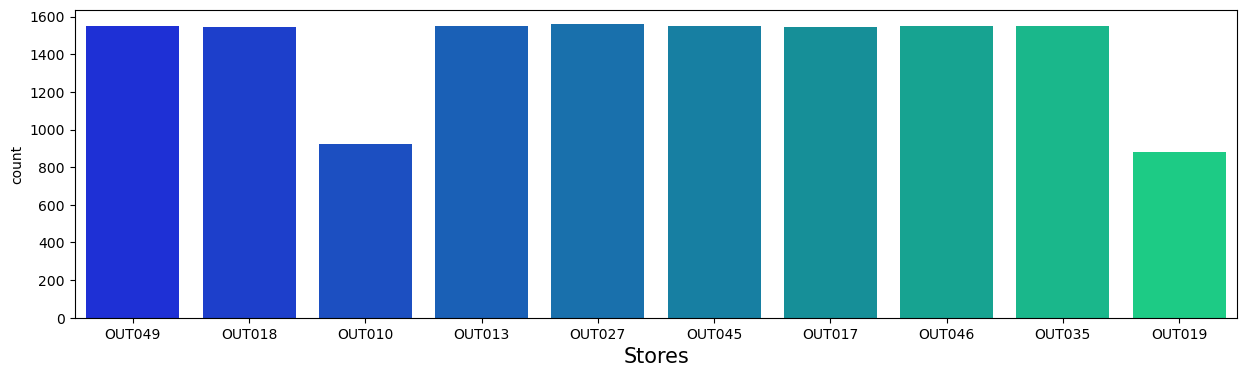

In [81]:
# CountPlot for Outlet_Identifier
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'Outlet_Identifier', palette = 'winter')
plt.xlabel('Stores', fontsize = 15)
plt.show()

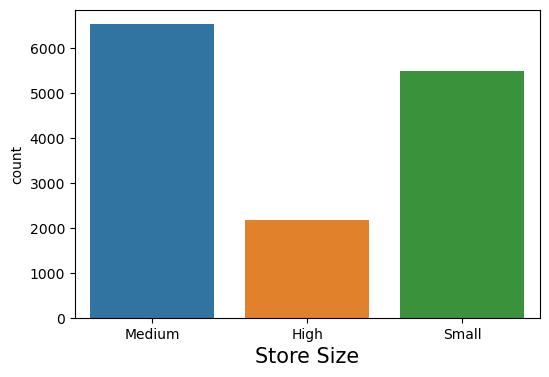

In [82]:
# CountPlot for Outlet_Size
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Outlet_Size')
plt.xlabel('Store Size', fontsize = 15)
plt.show()

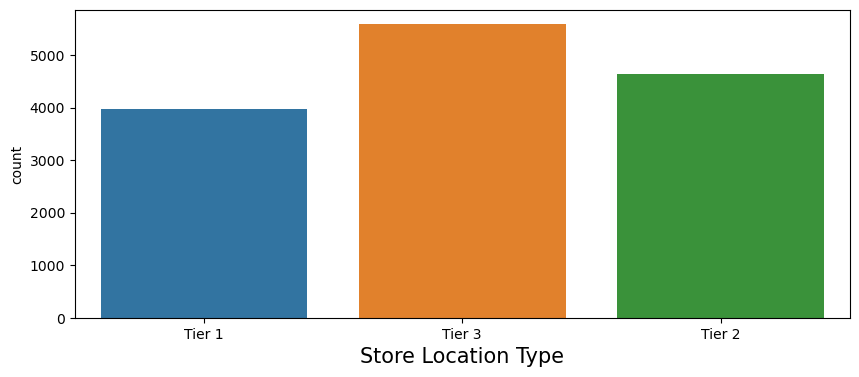

In [83]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize = 15)
plt.show()

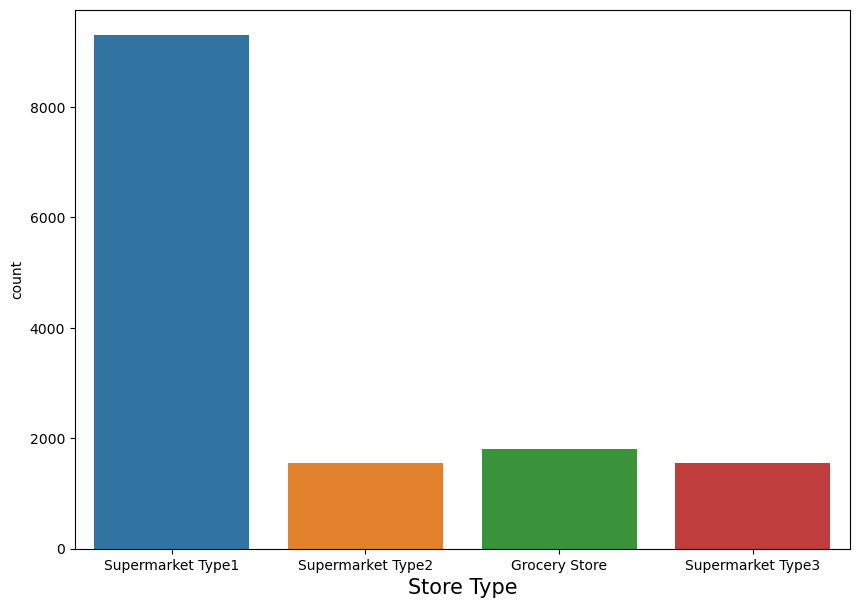

In [84]:
# CountPlot for Outlet_Type
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Outlet_Type')
plt.xlabel('Store Type', fontsize = 15)
plt.show() 

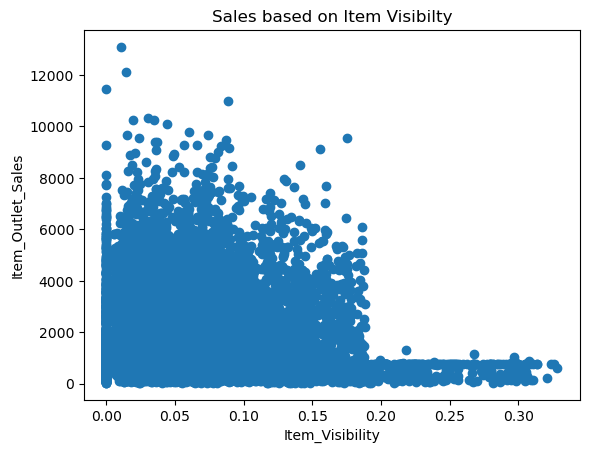

In [85]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

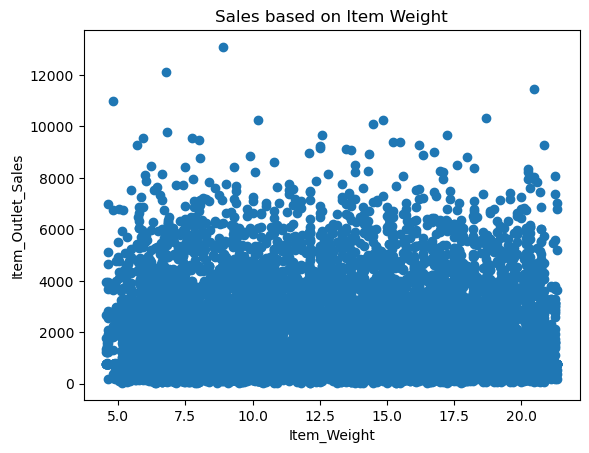

In [86]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

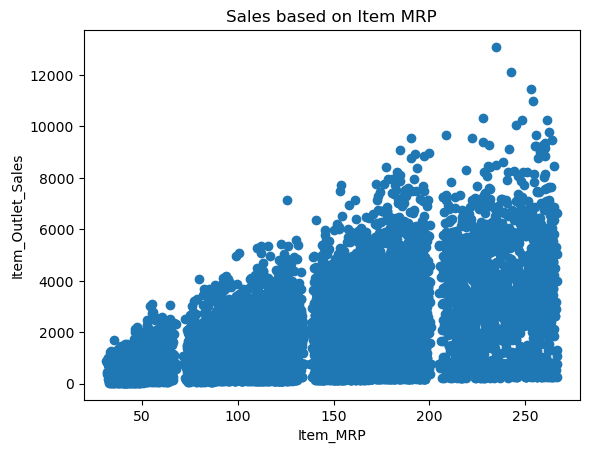

In [87]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


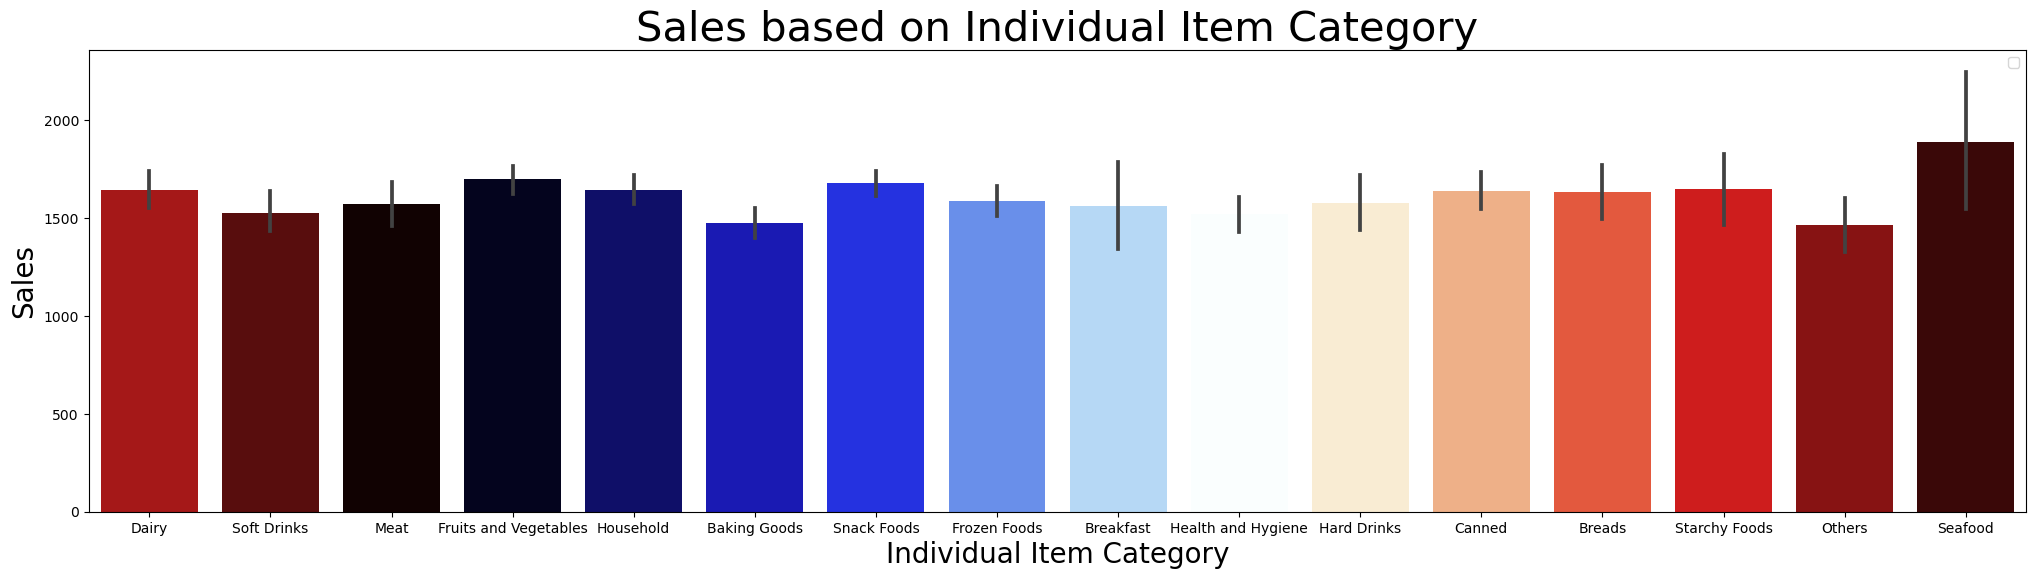

In [88]:
# BarPlot for Sales per Item_Type
plt.figure(figsize = (25,6))
sns.barplot(data = df,x = 'Item_Type', y = 'Item_Outlet_Sales', palette = 'flag')
plt.title('Sales based on Individual Item Category', fontsize = 30)
plt.xlabel('Individual Item Category', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


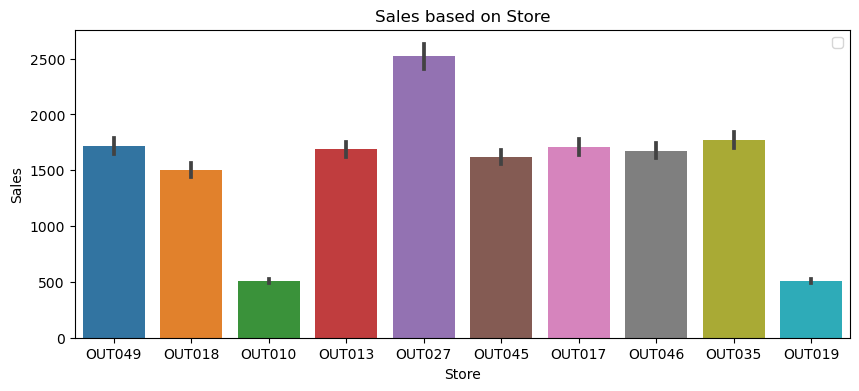

In [89]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize = (10,4))
sns.barplot(data = df,x = 'Outlet_Identifier', y = 'Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


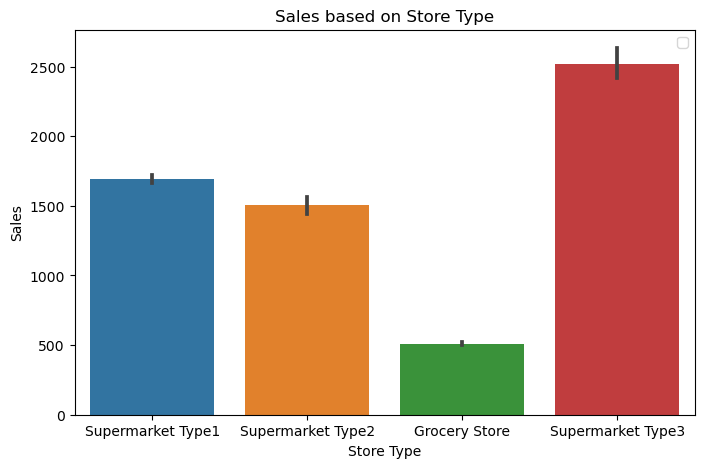

In [90]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize = (8,5))
sns.barplot(data = df,x = 'Outlet_Type', y = 'Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


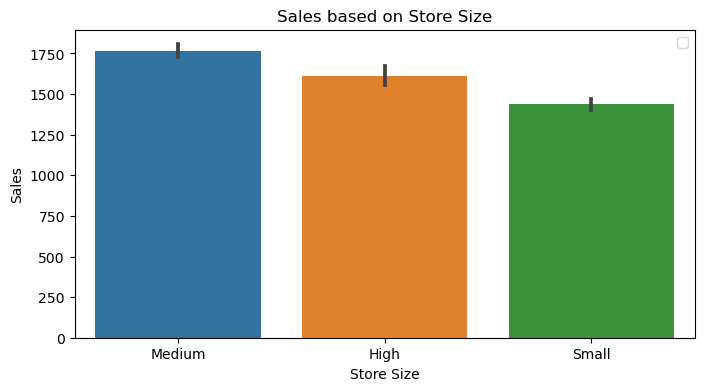

In [91]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize = (8,4))
sns.barplot(data = df,x = 'Outlet_Size', y = 'Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

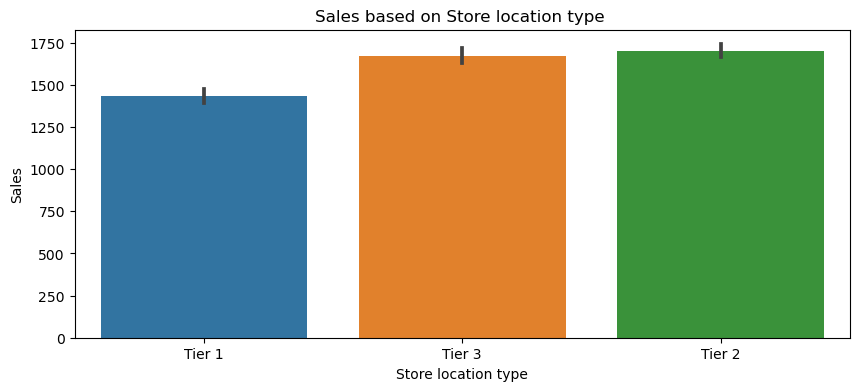

In [92]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize = (10,4))
sns.barplot(data = df,x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

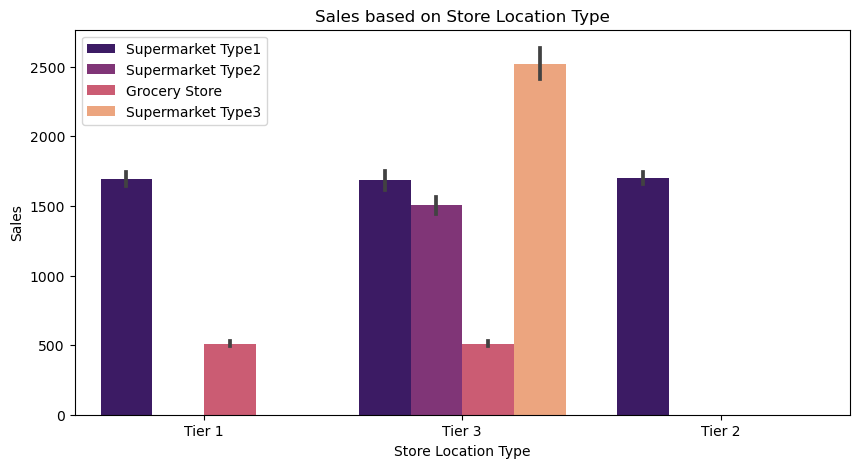

In [93]:
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales',hue = 'Outlet_Type',palette = 'magma')
plt.title('Sales based on Store Location Type')
plt.xlabel('Store Location Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

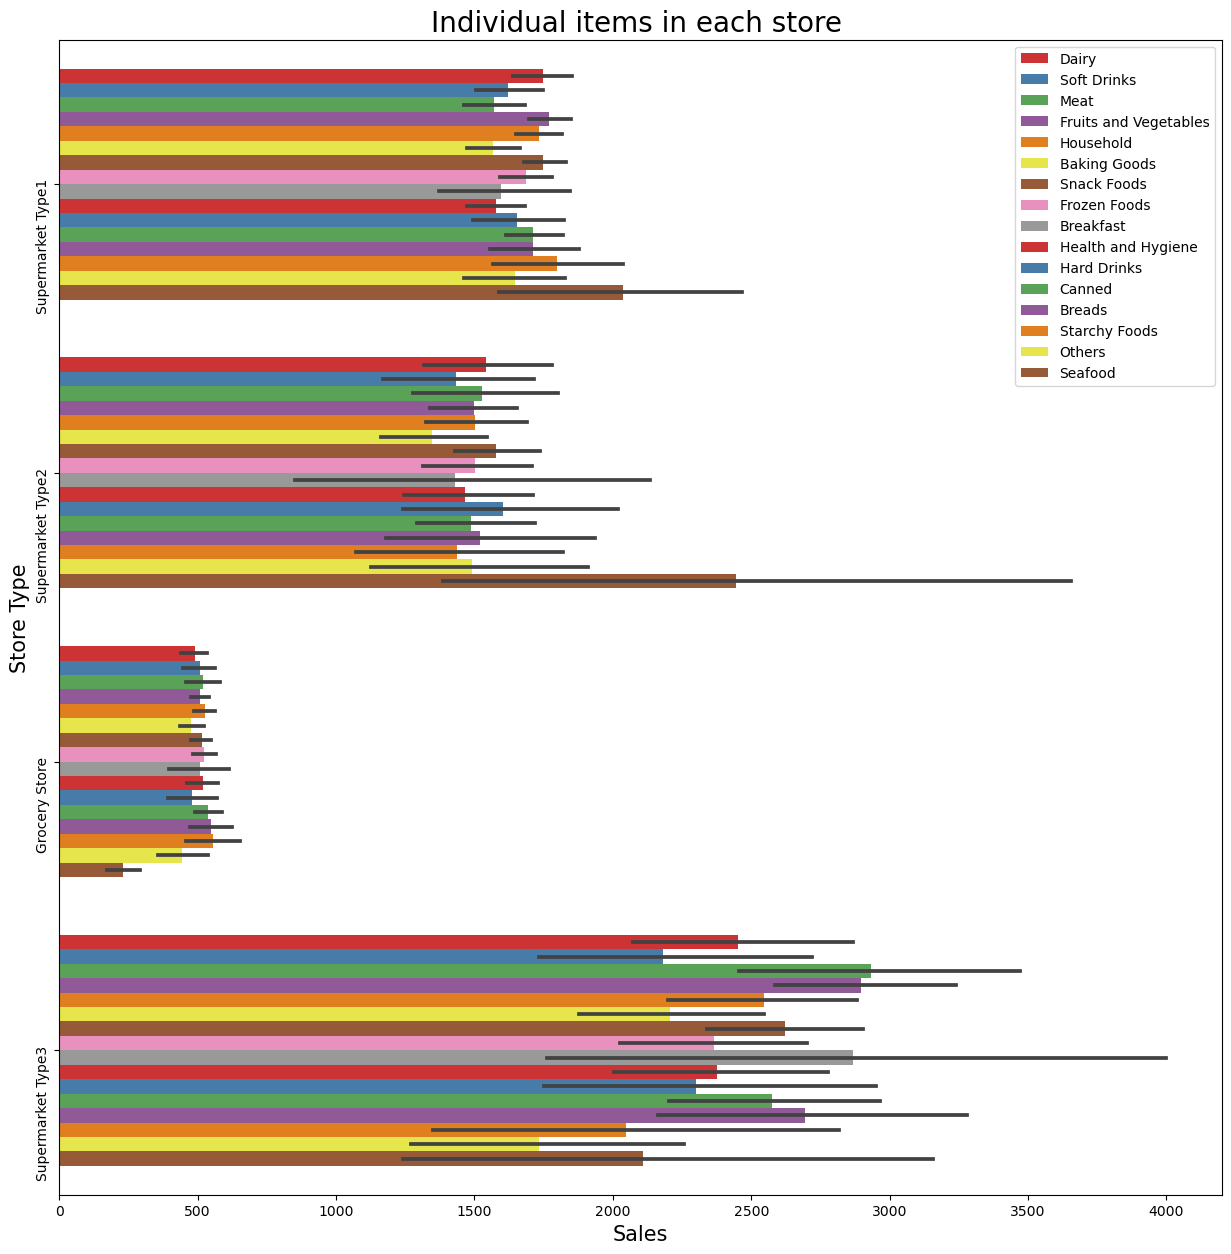

In [94]:
plt.figure(figsize=(15,15))
sns.barplot(data = df,x = 'Item_Outlet_Sales', y = 'Outlet_Type',hue = 'Item_Type',palette = 'Set1')
plt.title('Individual items in each store ', fontsize = 20)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Store Type', fontsize = 15)
plt.yticks(rotation = 90)
plt.legend()
plt.show()

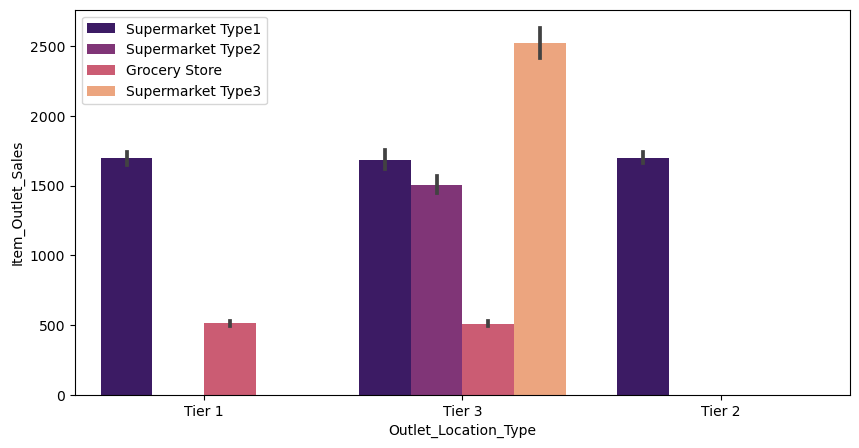

In [95]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales',hue = 'Outlet_Type',data = df,palette = 'magma')
plt.legend()

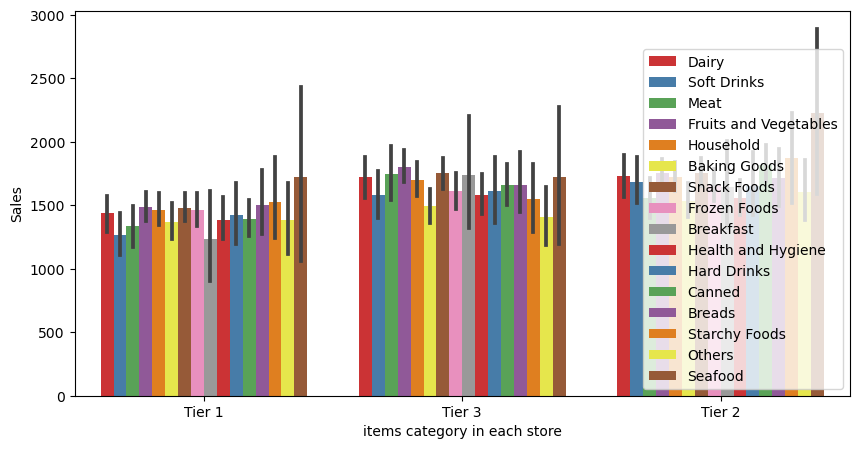

In [96]:
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',hue = 'Item_Type',palette = 'Set1')
plt.xlabel('items category in each store', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.legend()
plt.show()

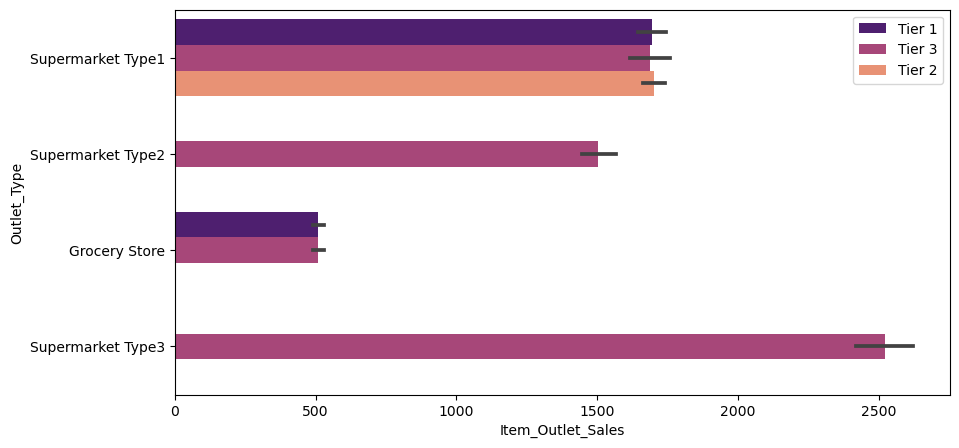

In [97]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'Outlet_Type',x = 'Item_Outlet_Sales',hue='Outlet_Location_Type',data = df,palette = 'magma')
plt.legend()

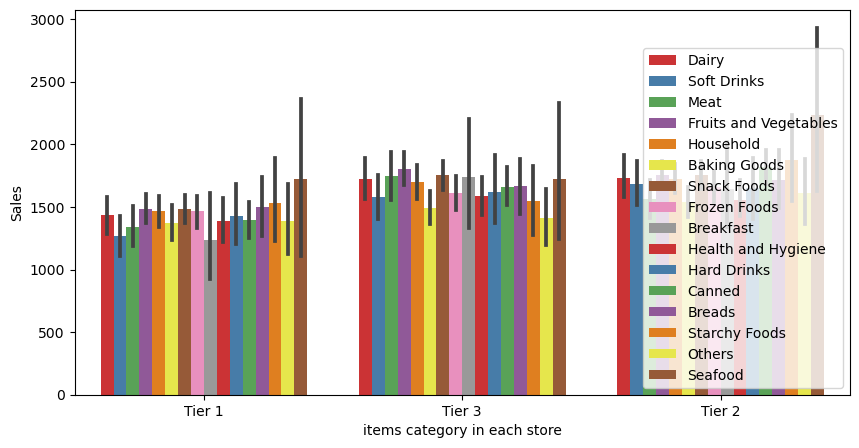

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',hue = 'Item_Type',palette = 'Set1')
plt.xlabel('items category in each store', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.legend()
plt.show()

In [99]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1, 'low fat': 2, 'LF': 3, 'reg': 4})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
df['Item_Type'] = df['Item_Type'].map({'Dairy': 0, 'Soft Drinks': 1, 'Meat': 2, 'Fruits and Vegetables': 3, 'Household': 4, 
                                       'Baking Goods': 5, 'Snack Foods': 6, 'Frozen Foods': 7, 'Breakfast': 8, 
                                       'Health and Hygiene': 9, 'Hard Drinks': 10, 'Canned': 11, 'Breads': 12, 'Starchy Foods': 13, 
                                       'Others': 14, 'Seafood': 15})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,1,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,2,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,3,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,4,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].map({'OUT049': 0, 'OUT018': 1, 'OUT010': 2, 'OUT013': 3, 'OUT027': 4, 
                                                       'OUT045': 5, 'OUT017': 6, 'OUT046': 7, 'OUT035': 8, 'OUT019': 9})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,1,48.2692,1,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,2,141.6180,0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,3,182.0950,2,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,4,53.8614,3,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium': 0, 'High': 1, 'Small': 2})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,0,1999,0,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,1,48.2692,1,2009,0,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,2,141.6180,0,1999,0,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,3,182.0950,2,1998,0,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,4,53.8614,3,1987,1,Tier 3,Supermarket Type1,994.7052


In [103]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,0,1999,0,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,1,48.2692,1,2009,0,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,2,141.6180,0,1999,0,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,3,182.0950,2,1998,0,2,Grocery Store,732.3800
4,8.93,0,0.000000,4,53.8614,3,1987,1,2,Supermarket Type1,994.7052


In [104]:
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1': 0, 'Supermarket Type2': 1, 'Grocery Store': 2, 
                                           'Supermarket Type3': 3})
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,5.92,1,0.019278,1,48.2692,1,2009,0,2,1,443.4228
2,17.50,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,19.20,1,0.000000,3,182.0950,2,1998,0,2,2,732.3800
4,8.93,0,0.000000,4,53.8614,3,1987,1,2,0,994.7052


In [105]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [106]:
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [107]:
# Model
model = LinearRegression(normalize=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
# vasulization of model's perfomance
LR_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)